# Visualise where the stations are

In [1]:
import csv
import warnings
from glob import glob
from textwrap import wrap

import cartopy.crs as ccrs
import iris
import iris.plot as iplt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import proplot as pplt
import regex as re
import scipy.stats as stats
import xarray as xr
import yaml
from adjustText import adjust_text
# from climix.metadata import load_metadata
from dask.distributed import Client
from tqdm.autonotebook import tqdm

/tmp/ipykernel_469/2134836672.py:20: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
with open("./scripts/station_info_all_vars.yml") as file:
    station_info = yaml.safe_load(file)

station_info["Stockholm-Observatoriekullen"]["var"].append("tasmax")
station_info.pop("Stockholm-Observatoriekullen A")

station_info["Uppsala"]["var"].append("tasmax")
station_info.pop("Uppsala Aut")

station_info["Örebro Flygplats"]["var"].append("pr")
station_info.pop("Örebro D")

{'lat': 59.244800000000005, 'lon': 15.285400000000001, 'var': ['pr']}

/home/erik/mambaforge/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "


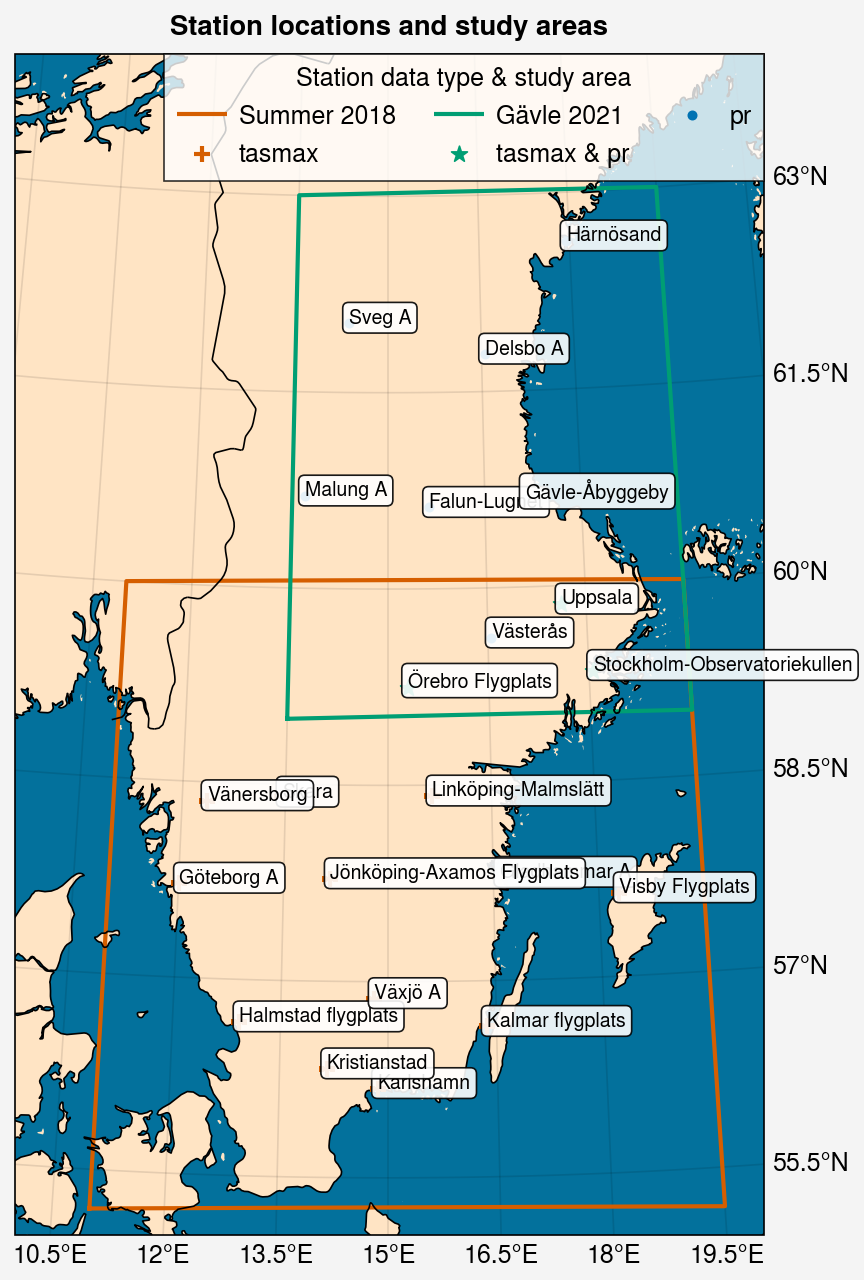

In [15]:
fig, ax = pplt.subplots(refheight="15cm", projection=ccrs.epsg(3006))
annotations = []
lats = []
lons = []
for key, values in station_info.items():
    if values["var"] == ["pr"]:
        color = "C0"
        label = "pr"
        marker = "."
    elif values["var"] == ["tasmax"]:
        color = "C1"
        label = "tasmax"
        marker = "+"
    else:
        color = "C2"
        label = "tasmax & pr"
        marker = "*"
    lats.append(values["lat"])
    lons.append(values["lon"])
    ax.scatter(
        values["lon"],
        values["lat"],
        c=color,
        label=label,
        marker=marker,
        zorder=3,
        transform=ccrs.PlateCarree(),
    )
    annotations.append(
        ax.text(
            values["lon"],
            values["lat"],
            key,
            c="k",
            bbox={"boxstyle": "round", "alpha": 0.9, "facecolor": "white"},
            fontsize=7,
            transform=ccrs.PlateCarree(),
        )
    )

ax.plot(
    [11, 19.5, 19.5, 11, 11],
    [55.2, 55.2, 60, 60, 55.2],
    color="C1",
    # linewidth=1,
    label="Summer 2018",
    zorder=2,
    transform=ccrs.PlateCarree(),
)

ax.plot(
    [13.5, 19.5, 19.5, 13.5, 13.5],
    [59.0, 59.0, 63, 63, 59.0],
    color="C2",
    # linewidth=1,
    label="Gävle 2021",
    zorder=2,
    transform=ccrs.PlateCarree(),
)


ax.format(
    coast=True,
    land=True,
    borders=True,
    facecolor="ocean blue",
    landcolor="bisque",
    reso="hi",
    lonlim=(10, 20),
    latlim=(55, 64),
    lonlabels=True,
    latlabels="r",
    suptitle="Station locations and study areas",
)
handles, labels = ax.get_legend_handles_labels()
legend_entries = dict(zip(labels, handles))
ax.legend(
    legend_entries.values(),
    legend_entries.keys(),
    title="Station data type & study area",
)

# adjust_text(
#     annotations,
#     lons,
#     lats,
#     expand_text=(1.1, 1.3),
#     expand_points=(1.1, 1.3),
#     force_text=(4.4, 4.4),
#     force_points=(4.5, 4.5),
#     ax=ax,
#     arrowprops={
#         "color": "black",
#         "arrowstyle": "-",
#     },
# )

In [10]:
fig.save("../../figs/station_map.pdf")

Only summer 2018

/home/sm_erhol/.conda/envs/erhol/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "


6

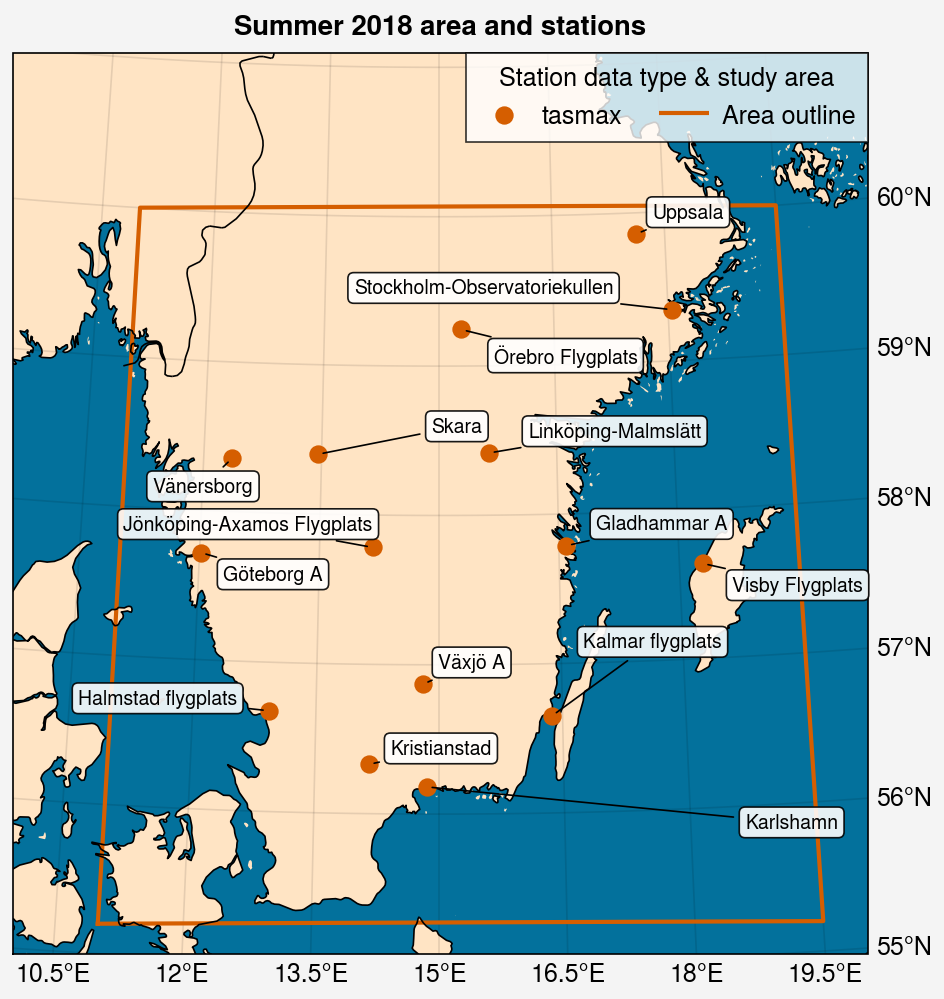

In [3]:
fig, ax = pplt.subplots(figwidth="12cm", projection=ccrs.epsg(3006))
annotations = []
lats = []
lons = []
for key, values in station_info.items():
    if values["var"] == ["pr"]:
        pass
    else:
        color = "C1"
        label = "tasmax"
        lats.append(values["lat"])
        lons.append(values["lon"])
        ax.scatter(
            values["lon"],
            values["lat"],
            c=color,
            label=label,
            zorder=3,
            transform=ccrs.PlateCarree(),
        )
        annotations.append(
            ax.text(
                values["lon"],
                values["lat"],
                key,
                c="k",
                bbox={"boxstyle": "round", "alpha": 0.9, "facecolor": "white"},
                fontsize=7,
                transform=ccrs.PlateCarree(),
            )
        )

ax.plot(
    [11, 19.5, 19.5, 11, 11],
    [55.2, 55.2, 60, 60, 55.2],
    color="C1",
    # linewidth=1,
    label="Area outline",
    zorder=2,
    transform=ccrs.PlateCarree(),
)


ax.format(
    coast=True,
    land=True,
    borders=True,
    facecolor="ocean blue",
    landcolor="bisque",
    reso="hi",
    lonlim=(10, 20),
    latlim=(55, 61),
    lonlabels=True,
    latlabels="r",
    suptitle="Summer 2018 area and stations",
)
handles, labels = ax.get_legend_handles_labels()
legend_entries = dict(zip(labels, handles))
ax.legend(
    legend_entries.values(),
    legend_entries.keys(),
    title="Station data type & study area",
)

adjust_text(
    annotations,
    lons,
    lats,
    expand_text=(1.1, 1.3),
    expand_points=(1.1, 1.3),
    force_text=(4.4, 4.4),
    force_points=(4.5, 4.5),
    ax=ax,
    arrowprops={
        "color": "black",
        "arrowstyle": "-",
    },
)

In [4]:
fig.save("../plots/station_map_summer_2018.pdf", facecolor="none")

## FAR map

In [4]:
index_name = "txge25"

In [5]:
station_far_res = pd.read_csv(f"./data/res/{index_name}_far_boot.csv")

/home/sm_erhol/.conda/envs/erhol/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/sm_erhol/.conda/envs/erhol/lib/python3.10/site-packages/matplotlib/collections.py:1114: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if num == "auto":


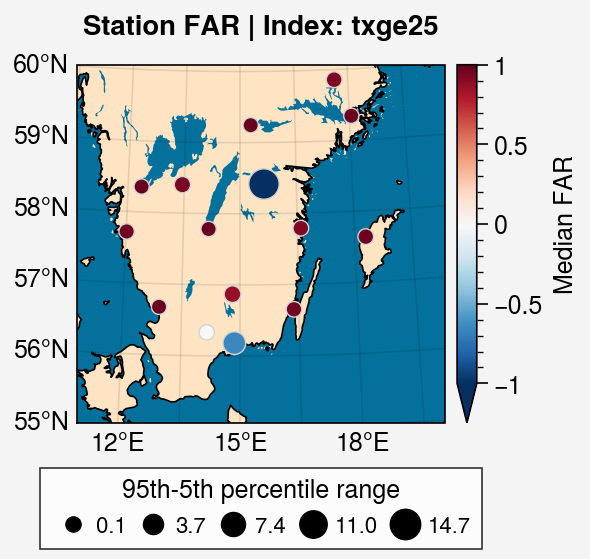

In [178]:
def normalise_inv(s, spread, smin, smax):
    return ((s - smin) / (smax-smin)) * np.ptp(spread) + np.min(spread)


fig, ax = pplt.subplots(figwidth="7.5cm", projection=ccrs.epsg(3006))

annotations = []
lats = []
lons = []
for key in station_far_res["Unnamed: 0"]:
    if key == "Uppsala Aut":
        key = "Uppsala"
    if key == "Stockholm-Observatoriekullen A":
        key = "Stockholm-Observatoriekullen"
    station = station_info[key]
    lats.append(station["lat"])
    lons.append(station["lon"])

med_far = station_far_res.iloc[:, 1:].median(axis=1)
spread = np.subtract(*np.quantile(station_far_res.iloc[:, 1:], [0.95, 0.05], axis=1))
smin = 30
smax = 120
spread_norm = ((smax-smin)*(spread - np.min(spread))/np.ptp(spread)) + smin
sc = ax.scatter(
    lons,
    lats,
    c=med_far,
    s=spread_norm,
    absolute_size=True,
    # smin=smin,
    # smax=smax,
    vmax=1,
    vmin=-1,
    zorder=3,
    edgecolor="lightgray",
    linewidth=0.5,
    extend="min",
    transform=ccrs.PlateCarree(),
)

ax.colorbar(sc, label="Median FAR", width="0.25cm")

handles, labels = sc.legend_elements(
    "sizes",
    num=np.histogram_bin_edges(spread, 4),
    fmt="{x:.1f}",
    func=lambda x: normalise_inv(x, spread, smin, smax)
)
ax.legend(
    handles,
    labels,
    title="95th-5th percentile range",
    # loc="lower right",
    loc="b",
    ncols=5,
    handletextpad=0.01,
    columnspacing=0.2,
    fontsize=8,
)

ax.format(
    coast=True,
    land=True,
    lakes=True,
    lakescolor="ocean blue",
    facecolor="ocean blue",
    landcolor="bisque",
    reso="hi",
    lonlim=(11, 20),
    latlim=(55, 60),
    lonlabels=True,
    latlabels="l",
    suptitle=f"Station FAR | Index: {index_name}",
)

In [179]:
fig.save(f"../plots/far_map_{index_name}.pdf")